# Execution Trace
- **Start Timestamp (UTC)**: 2025-01-17T06:36:40.312715+00:00
- **OS**: Linux 5.15.0-125-generic #135~20.04.1-Ubuntu SMP Mon Oct 7 13:56:22 UTC 2024
- **Machine**: x86_64
- **Python Info**: 3.12.4-final0
- **Python Environment Hash**: 254ed744c6afa6cb7a82cb312f75f9fcd1c4da2c13d780212e30fa7339309c54
- **CAPTCHA**:

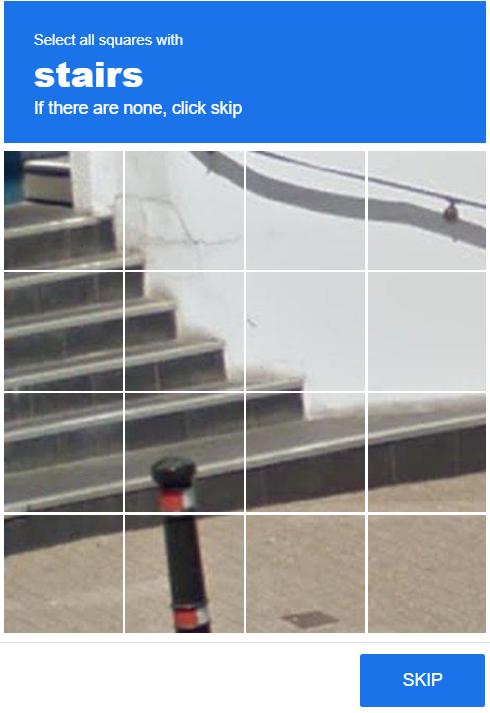

## Objective Identification

In [ ]:
def stage1(frames):
    # Step 1: Provide one-sentence visual description of each frame.
    describe(0, "A blue rectangular button labeled 'SKIP' is positioned on the right side of a white background.")
    describe(1, "A grid of squares displaying an image of stairs and a pole, with some squares containing parts of the stairs.")
    describe(2, "A blue instruction box with the text 'Select all squares with stairs. If there are none, click skip.'")

    # Step 2: Identify the relationships between frames.
    relate(2, 1, "Frame 2 provides instructions to interact with the grid in Frame 1.")
    relate(0, 2, "Frame 0 provides an alternative action if the condition in Frame 2 is met.")

    # Step 3: Identify the sequential events and the final visual criteria.
    objective(
        "Click on all squares in the grid (Frame 1) that contain stairs as per the instruction in Frame 2. "
        "If no squares contain stairs, click the 'SKIP' button in Frame 0."
    )

## Structure Abstraction

In [ ]:
def stage2(frames):
    # Frame 0: Blank interface with a 'SKIP' button
    frame_0 = frames[0]
    skip_button = frame_0.get_element(position='down', details='blue rectangle with text SKIP')
    skip_button.set_element_as(interactable='NEXT')

    # Frame 1: Grid of squares displaying a partially visible motorcycle
    frame_1 = frames[1]
    frame_1.set_frame_as(interactable='POINTABLE')
    grid = frame_1.grid(tiles=16)  # Assuming a 4x4 grid
    for row in grid:
        for element in row:
            element.set_element_as(interactable='SELECTABLE')

    # Return the modified frames
    return frames


## Solution Composition

In [ ]:
def stage3(frames):
    target_object = ask([frames[2].image], "What is the target object?", "str")[-1]
    keypoint_image = frames[1].show_keypoints(region="all")
    keypoint_ids = ask([keypoint_image], f"List all points that are part of {target_object}", "int")
    tiles = [frames[1].get_interactable(i) for i in range(16)]

    answers = set()
    for keypoint_id in keypoint_ids:
        keypoint = frames[1].get_keypoint(keypoint_id)
        for i, tile in enumerate(tiles):
            if keypoint.is_within(tile): answers.add(i)

    for answer in answers:
        select(tiles[answer])

    submit_button = frames[0].get_interactable(0)
    click(submit_button)

In [ ]:
PROMPT = '''
## Objective
Given the list of images, answer the question: What is the target object?
Output a list of strings for each image.
You should follow the format `answer(strings=["a", "b", ...])` to answer the question.

'''

Image 0
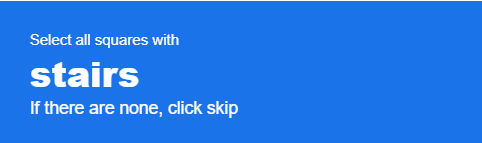

In [ ]:
IMAGES = 1

In [ ]:
RESPONSE = '''
answer(strings=["stairs"])
'''
TIME = 1.1139229121617973
FINGERPRINT = fp_60a3f2dc65
TOTAL_TOKENS = 506
PROMPT_TOKENS = 500
COMPLETION_TOKENS = 6

---

In [ ]:
PROMPT = '''
## Objective
Given the list of images, answer the question: List all points that are part of stairs
Output a list of numbers for each image.
You should follow the format `answer(numbers=[1, 2, ...])` to answer the question.

'''

Image 0
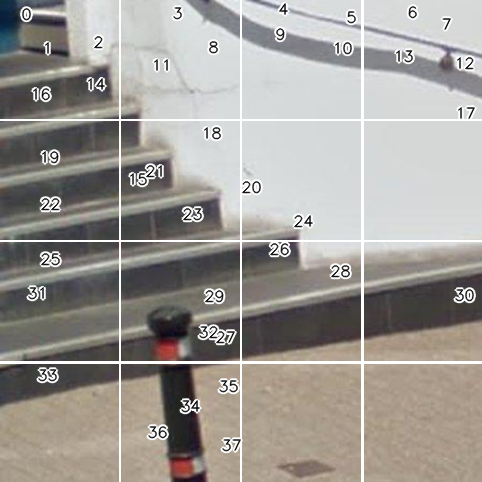

In [ ]:
IMAGES = 1

In [ ]:
RESPONSE = '''
answer(numbers=[15, 19, 22, 23, 25, 26, 29])
'''
TIME = 1.4870515642687678
FINGERPRINT = fp_60a3f2dc65
TOTAL_TOKENS = 527
PROMPT_TOKENS = 503
COMPLETION_TOKENS = 24

---